## Lab7:Loan approval classification using SVM

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [9]:
df.Gender.value_counts

<bound method IndexOpsMixin.value_counts of 0        Male
1        Male
2        Male
3        Male
4        Male
5        Male
6        Male
7        Male
8        Male
9        Male
10       Male
11       Male
12       Male
13       Male
14       Male
15       Male
16       Male
17     Female
18       Male
19       Male
20       Male
21       Male
22       Male
23        NaN
24       Male
25       Male
26       Male
27       Male
28       Male
29     Female
        ...  
584      Male
585      Male
586      Male
587    Female
588       NaN
589      Male
590      Male
591      Male
592       NaN
593      Male
594      Male
595      Male
596      Male
597      Male
598      Male
599      Male
600    Female
601      Male
602      Male
603      Male
604    Female
605      Male
606      Male
607      Male
608      Male
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object>

In [10]:
df["Dependents"].fillna("NO_dep",inplace=True)

In [11]:
df["Dependents"]

0           0
1           1
2           0
3           0
4           0
5           2
6           0
7          3+
8           2
9           1
10          2
11          2
12          2
13          0
14          2
15          0
16          1
17          0
18          0
19          0
20          0
21          1
22          0
23          2
24          1
25          0
26          0
27          2
28          0
29          2
        ...  
584         1
585         1
586         0
587         0
588         0
589         2
590         0
591         2
592        3+
593         0
594         0
595         0
596         2
597    NO_dep
598         0
599         2
600        3+
601         0
602        3+
603         0
604         1
605         0
606         1
607         2
608         0
609         0
610        3+
611         1
612         2
613         0
Name: Dependents, Length: 614, dtype: object

In [12]:
dept={"0":0,"1":1,"2":2,"3+":3,"NO_dep":0}
df.Dependents=[dept[item]for item in df.Dependents]

In [13]:
df['Dependents'].astype(int)

0      0
1      1
2      0
3      0
4      0
5      2
6      0
7      3
8      2
9      1
10     2
11     2
12     2
13     0
14     2
15     0
16     1
17     0
18     0
19     0
20     0
21     1
22     0
23     2
24     1
25     0
26     0
27     2
28     0
29     2
      ..
584    1
585    1
586    0
587    0
588    0
589    2
590    0
591    2
592    3
593    0
594    0
595    0
596    2
597    0
598    0
599    2
600    3
601    0
602    3
603    0
604    1
605    0
606    1
607    2
608    0
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int32

In [14]:
df['Gender'].fillna(df["Gender"].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Education'].fillna(df['Education'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)      

In [15]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [16]:
df.drop(["Loan_ID"],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,Male,Yes,3,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

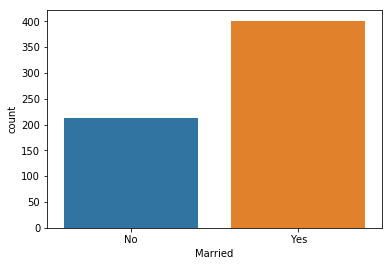

In [18]:
sns.countplot(x='Married',data=df)  
plt.show()

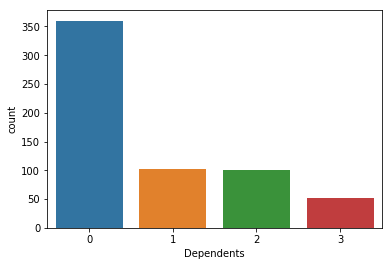

In [19]:
sns.countplot(x='Dependents',data=df)  
plt.show()  

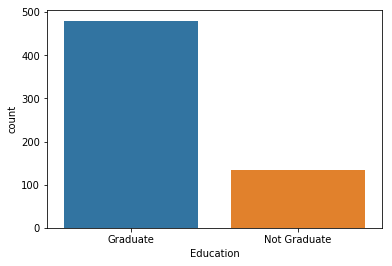

In [20]:
sns.countplot(x='Education',data=df)  
plt.show()

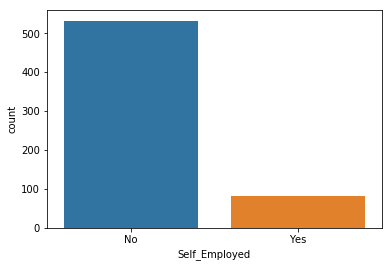

In [21]:
sns.countplot(x='Self_Employed',data=df)  
plt.show()


In [22]:
x=df.drop(['Loan_Status'],axis=1)

In [23]:
y=df.pop('Loan_Status')

In [24]:
x=pd.get_dummies(x)

In [25]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)


In [26]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()

In [27]:
x_train_ss=ss.fit_transform(x_train)
x_train_ss

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.71703534, -0.50133384,  0.27865737, ..., -0.62317695,
        -0.79056942,  1.40682858],
       [-0.71703534, -0.42803179,  0.45103751, ...,  1.60468065,
        -0.79056942, -0.71081865],
       [-0.71703534, -0.5669725 ,  0.23208844, ..., -0.62317695,
         1.26491106, -0.71081865],
       ...,
       [-0.71703534, -0.37088951, -0.59751445, ..., -0.62317695,
        -0.79056942,  1.40682858],
       [-0.71703534,  0.76362634, -0.59751445, ..., -0.62317695,
         1.26491106, -0.71081865],
       [-0.71703534,  1.36387019, -0.59751445, ..., -0.62317695,
        -0.79056942,  1.40682858]])

In [28]:
x_test_ss=ss.fit_transform(x_test)
x_test_ss

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.78697069,  0.60310661, -0.4897835 , ..., -0.68429085,
         1.31171195, -0.67579058],
       [-0.78697069, -0.1508012 , -0.4897835 , ..., -0.68429085,
         1.31171195, -0.67579058],
       [ 1.15422368, -0.17338842, -0.07075971, ...,  1.4613669 ,
        -0.7623625 , -0.67579058],
       ...,
       [ 1.15422368,  1.02547189, -0.4897835 , ..., -0.68429085,
        -0.7623625 ,  1.47974835],
       [-0.78697069, -0.34587267,  0.20984434, ...,  1.4613669 ,
        -0.7623625 , -0.67579058],
       [-0.78697069,  0.03716241, -0.4897835 , ...,  1.4613669 ,
        -0.7623625 , -0.67579058]])

In [29]:
from sklearn.svm import LinearSVC
lvc=LinearSVC()
lvc.fit(x_train_ss,y_train)
l_pred=lvc.predict(x_test_ss)
l_pred


array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [30]:
from sklearn.metrics import accuracy_score as acs
lvc_acc=acs(y_test,l_pred)
lvc_acc

0.7513513513513513

In [31]:
from sklearn.metrics import confusion_matrix as cm
mat=cm(y_test,l_pred)
mat

array([[ 21,  44],
       [  2, 118]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report as cr
cre=cr(y_test,l_pred)
print(cre)

              precision    recall  f1-score   support

           N       0.91      0.32      0.48        65
           Y       0.73      0.98      0.84       120

   micro avg       0.75      0.75      0.75       185
   macro avg       0.82      0.65      0.66       185
weighted avg       0.79      0.75      0.71       185



In [37]:
from sklearn.linear_model import LogisticRegression 
lor=LogisticRegression()
lor.fit(x_train_ss,y_train)
lr_pred=lor.predict(x_test_ss)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
from sklearn.svm import LinearSVC
lvc=LinearSVC()
lvc.fit(x_train_ss,y_train)
l_pred=lvc.predict(x_test_ss)

In [35]:
from sklearn.metrics import accuracy_score as acs
lvc_acc=acs(y_test,l_pred)
print("linear accuracy score:",lvc_acc)

linear accuracy score: 0.7513513513513513


In [36]:
lvc_acc=acs(y_test,lr_pred)
print("logistic regression accuracy score:",lvc_acc)

logistic regression accuracy score: 0.7783783783783784
